# Understand the Problem Statement

## Objective:
The goal is to create a model that can predict whether a customer will churn (i.e., leave the service) based on various customer attributes.


## Synthetic Data:
Since the data is synthetic, ensure it closely mimics real-world distributions, correlations, and patterns typically found in telecom churn datasets.

# Data Generation
## Features:
* **Customer Demographics**: CustomerID, Age, Gender.
* **Account Information**: ContractType, MonthlyCharges, TotalCharges, PaymentMethod.
* **Service Information**: TechSupport, InternetService, PaperlessBilling, Tenure.
* **Derived Features**: AverageMonthlyCharges, CustomerLifetimeValue.
* **Target Variable**: Churn (0 for no churn, 1 for churn).

In [40]:
# import libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [39]:
# Set the random seed for reproducibility
np.random.seed(42)

# Genearte the synthetic variables

# Total no. of customers
num_of_customers = 5000

# CustomerID
customer_ids = np.arange(1, num_of_customers + 1)

# Age
ages = np.random.randint(18, 81, size=num_of_customers)

# Gender
genders = np.random.choice(['Male', 'Female'], size=num_of_customers)

# ContractType
contract_types = np.random.choice(['Month-to-month', 'One year', 'Two year'],
                                  size=num_of_customers, p=[0.4, 0.3, 0.3])

# MonthlyCharges
monthly_charges = np.round(np.random.uniform(20, 120, size=num_of_customers), 2)

# Tenure
tenures = np.random.randint(1, 73, size=num_of_customers)

# totalCharges as MonthlyCharges * Tenure with some noise
total_charges = np.round(monthly_charges * tenures + np.random.normal(0, 10, size=num_of_customers), 2)

# Customer techSupport( binary attribute)
tech_support = np.random.choice(['No', 'Yes'], size=num_of_customers, p=[0.7, 0.3])

# InternetService
internet_service = np.random.choice(['DSL', 'Fiber optic', 'No'],
                                    size=num_of_customers, p=[0.4, 0.5, 0.1])

# PaperlessBilling ( binary attribute)
paperless_billing = np.random.choice(['Yes', 'No'], size=num_of_customers, p=[0.6, 0.4])

# PaymentMethods
payment_method = np.random.choice(['Credit card', 'Bank transfer', 'Electronic check', 'Mailed check'],
                                  size=num_of_customers, p=[0.3, 0.25, 0.25, 0.2])

# Churn (Target variable)
churn = np.random.choice(['No', 'Yes'], size=num_of_customers, p=[0.8, 0.2])

# Derived Features
average_monthly_charges = np.round(total_charges / tenures, 2)
customer_lifetime_value = np.round(monthly_charges * tenures, 2)



In [41]:
# Create customer info dataFrame

df = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'ContractType': contract_types,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges,
    'TechSupport': tech_support,
    'InternetService': internet_service,
    'Tenure': tenures,
    'PaperlessBilling': paperless_billing,
    'PaymentMethod': payment_method,
    'Churn': churn,
    'AverageMonthlyCharges': average_monthly_charges,
    'CustomerLifetimeValue': customer_lifetime_value
})

df.head()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,AverageMonthlyCharges,CustomerLifetimeValue
0,1,56,Female,Month-to-month,106.68,2027.38,No,Fiber optic,19,Yes,Credit card,No,106.70,2026.92
1,2,69,Male,Month-to-month,71.92,130.55,No,No,2,No,Credit card,No,65.28,143.84
2,3,46,Female,Two year,119.32,6553.96,No,Fiber optic,55,Yes,Bank transfer,No,119.16,6562.60
3,4,32,Female,Month-to-month,21.16,216.19,Yes,No,11,No,Mailed check,No,19.65,232.76
4,5,60,Male,Month-to-month,49.96,853.61,No,DSL,17,Yes,Bank transfer,Yes,50.21,849.32


In [6]:
# total no.of rows and columns in data
df.shape

(5000, 14)

In [7]:
# data information (columnname, total no of values per column, datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   ContractType           5000 non-null   object 
 4   MonthlyCharges         5000 non-null   float64
 5   TotalCharges           5000 non-null   float64
 6   TechSupport            5000 non-null   object 
 7   InternetService        5000 non-null   object 
 8   Tenure                 5000 non-null   int64  
 9   PaperlessBilling       5000 non-null   object 
 10  PaymentMethod          5000 non-null   object 
 11  Churn                  5000 non-null   object 
 12  AverageMonthlyCharges  5000 non-null   float64
 13  CustomerLifetimeValue  5000 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 547.0+ 

In [36]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
CustomerID,0
Age,0
Gender,0
ContractType,0
MonthlyCharges,0
TotalCharges,0
TechSupport,0
InternetService,0
Tenure,0
PaperlessBilling,0


Since this is synthetic data, there are no missing values. If there were, we would handle them here.

In [9]:
# remove 'CustomerID' column
df.drop('CustomerID',axis=1,inplace=True)

In [37]:
# Summary statistics for numerical columns
summary_stats = df.describe()
summary_stats

,CustomerID,Age,MonthlyCharges,TotalCharges,Tenure,AverageMonthlyCharges,CustomerLifetimeValue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,49.345800,70.059154,2551.048128,36.324400,70.071292,2550.805310
std,1443.520003,18.185301,28.716275,1886.805679,20.772517,28.749228,1886.661798
min,1.000000,18.000000,20.010000,3.650000,1.000000,3.650000,20.810000
25%,1250.750000,34.000000,45.532500,1024.987500,18.000000,45.537500,1026.420000
50%,2500.500000,50.000000,70.225000,2131.215000,36.000000,70.100000,2133.120000
75%,3750.250000,65.000000,94.420000,3716.595000,54.000000,94.405000,3709.950000
max,5000.000000,80.000000,119.990000,8563.350000,72.000000,125.560000,8569.440000


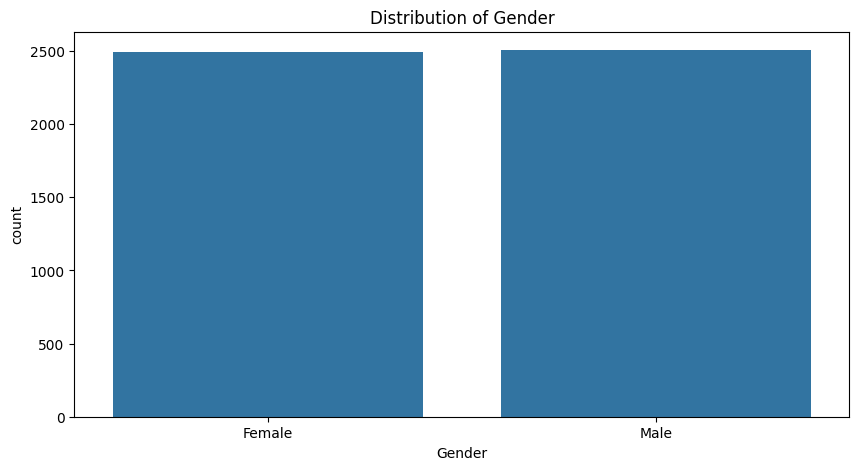

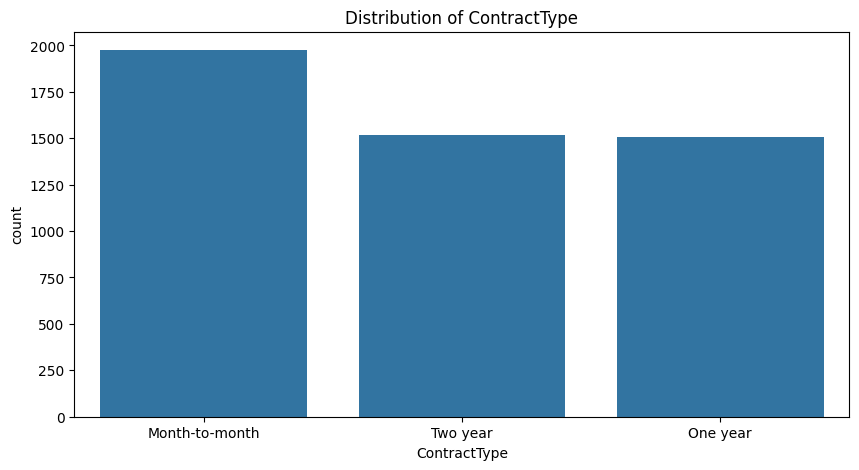

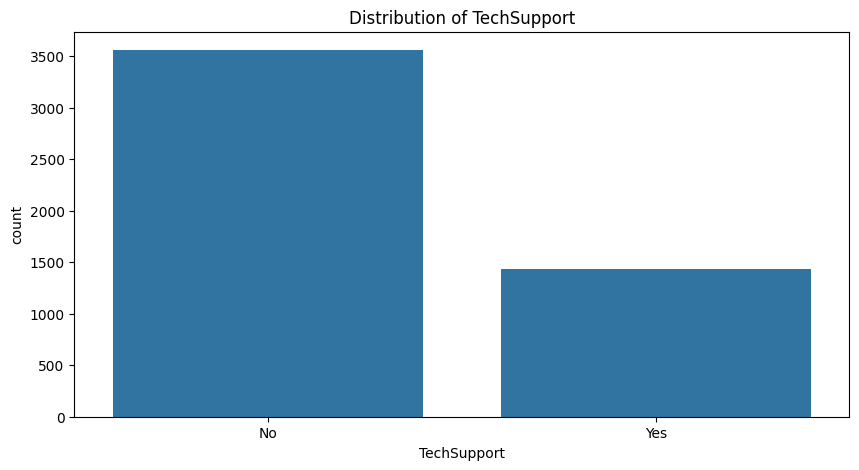

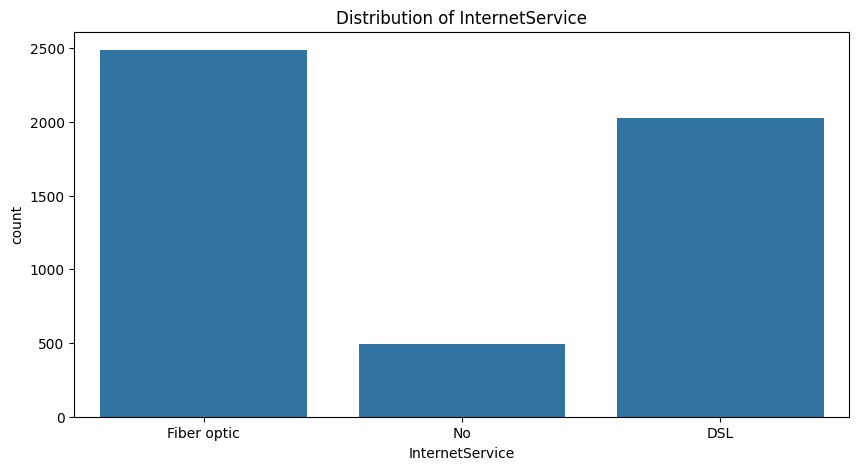

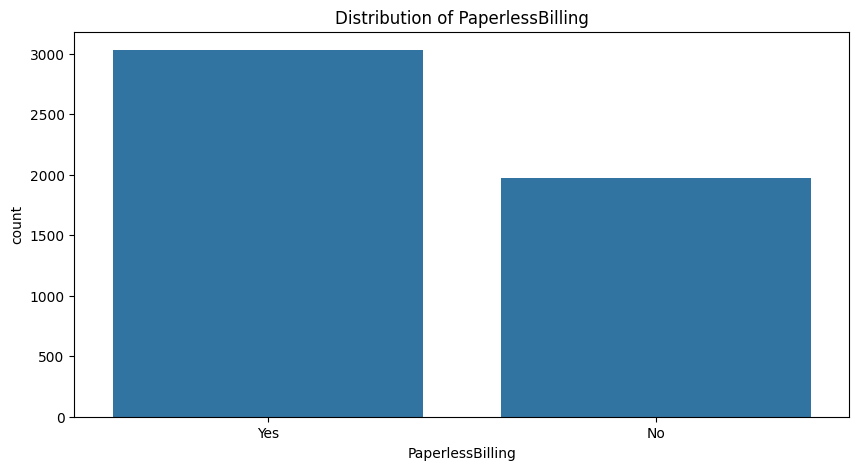

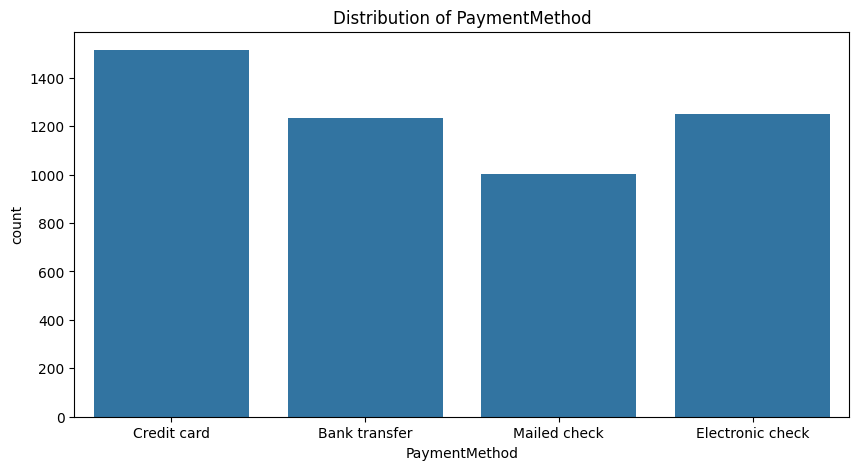

In [11]:
# import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of categorical data attributes
categorical_features = ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

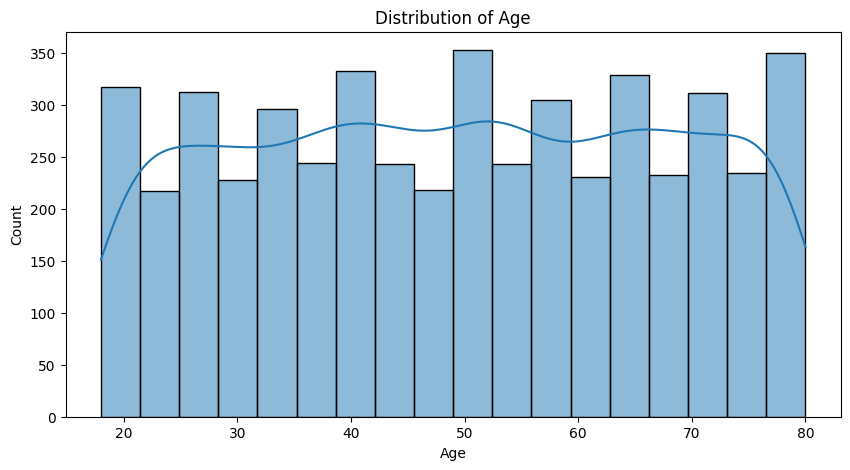

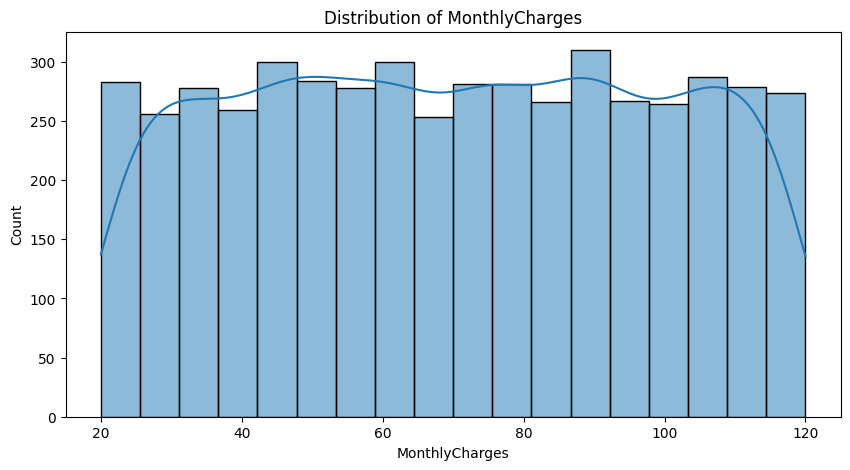

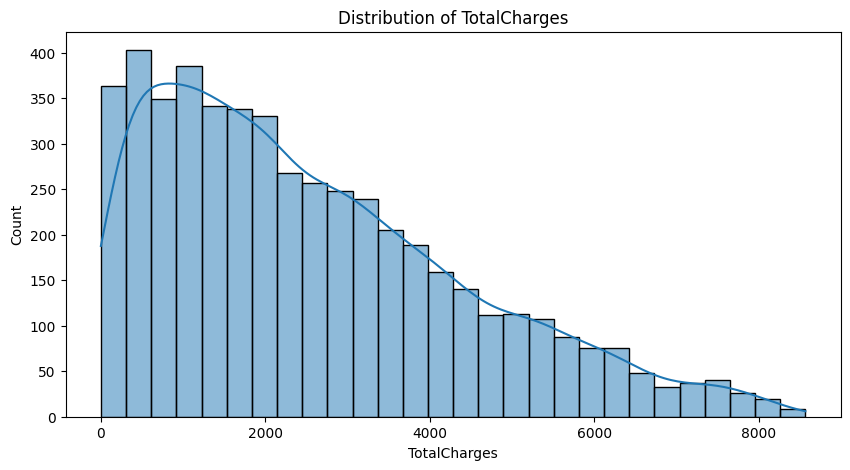

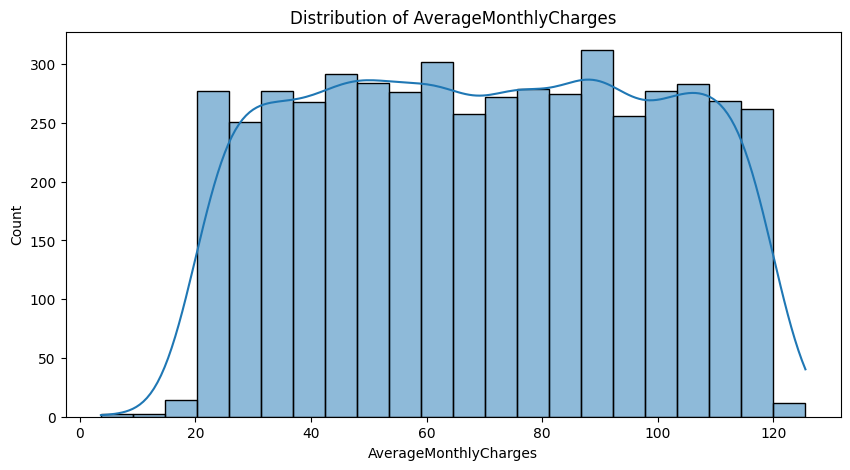

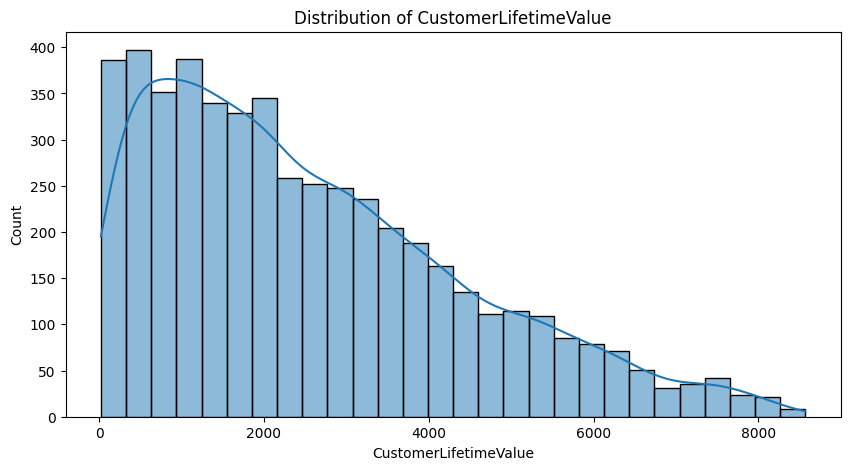

In [12]:
# Plot numerical features (plot histograms)
numerical_features = ['Age', 'MonthlyCharges', 'TotalCharges', 'AverageMonthlyCharges', 'CustomerLifetimeValue']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

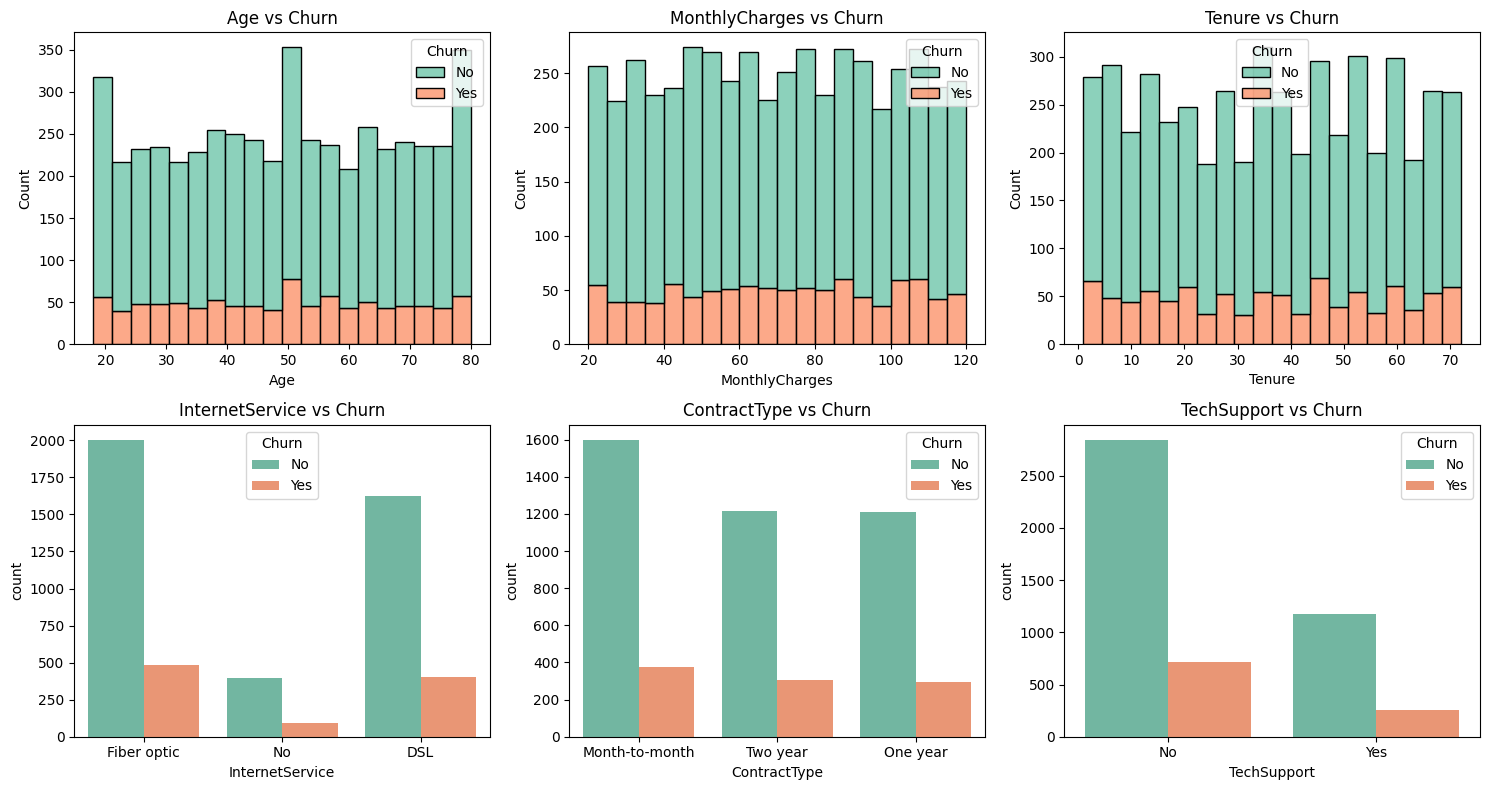

In [13]:
# Visualize the relationships between numerical features and target variable (Churn)
plt.figure(figsize=(15, 8))

# Age vs Churn
plt.subplot(2, 3, 1)
sns.histplot(df, x='Age', hue='Churn', multiple='stack', bins=20, palette='Set2')
plt.title('Age vs Churn')

# MonthlyCharges vs Churn
plt.subplot(2, 3, 2)
sns.histplot(df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=20, palette='Set2')
plt.title('MonthlyCharges vs Churn')

# Tenure vs Churn
plt.subplot(2, 3, 3)
sns.histplot(df, x='Tenure', hue='Churn', multiple='stack', bins=20, palette='Set2')
plt.title('Tenure vs Churn')

# InternetService vs Churn
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')
plt.title('InternetService vs Churn')

# ContractType vs Churn
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='ContractType', hue='Churn', palette='Set2')
plt.title('ContractType vs Churn')

# TechSupport vs Churn
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='Set2')
plt.title('TechSupport vs Churn')

plt.tight_layout()
plt.show()



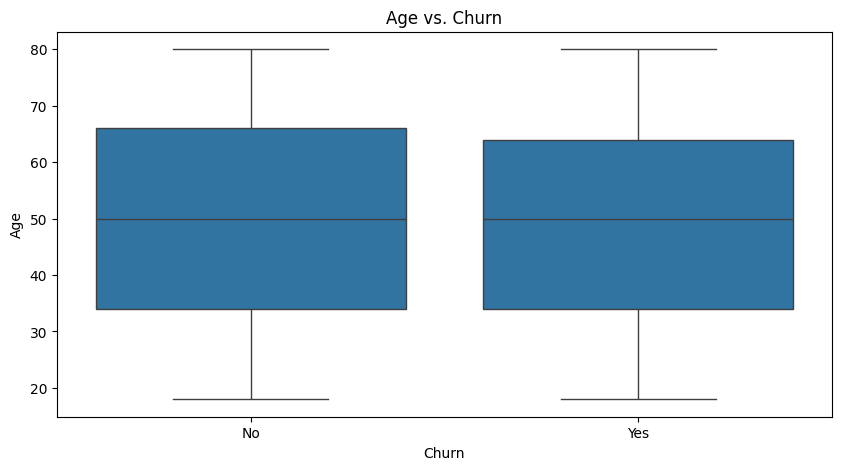

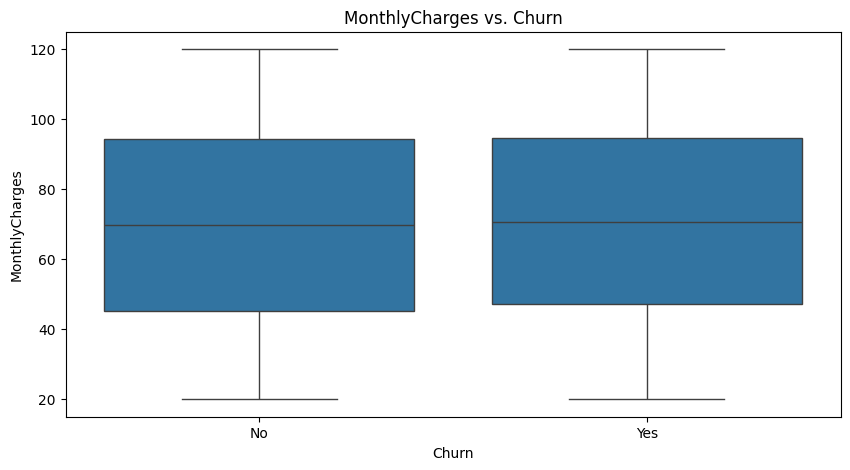

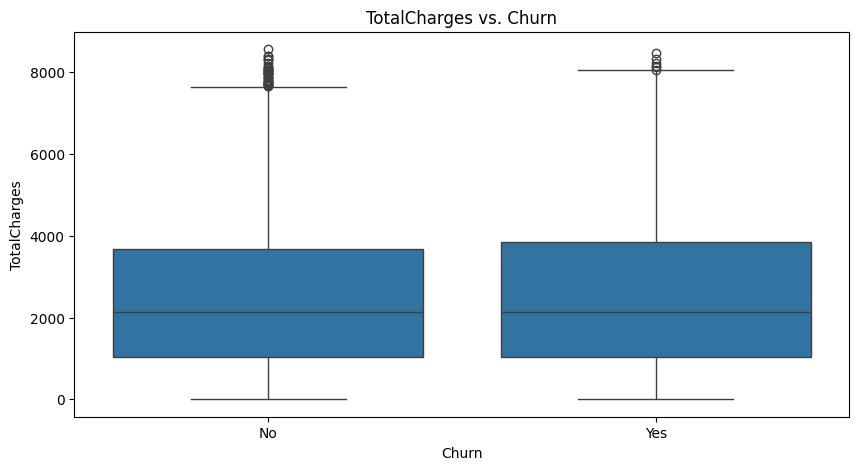

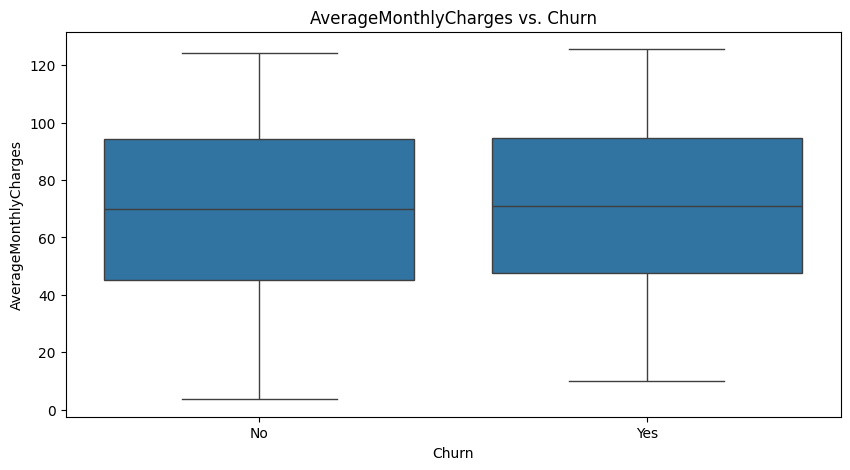

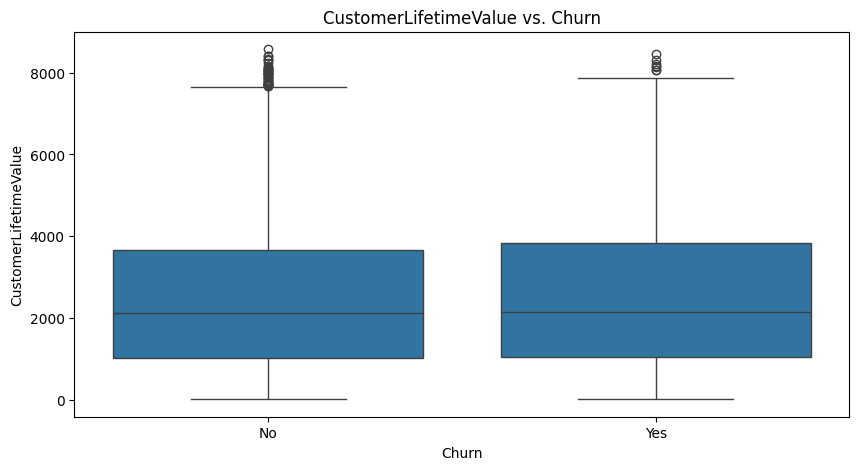

In [14]:
# plot the boxplot detect the outliers

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'{feature} vs. Churn')
    plt.show()

In [15]:
# selecting numerical features
numerical_features = df.select_dtypes(include=[int,float]).columns

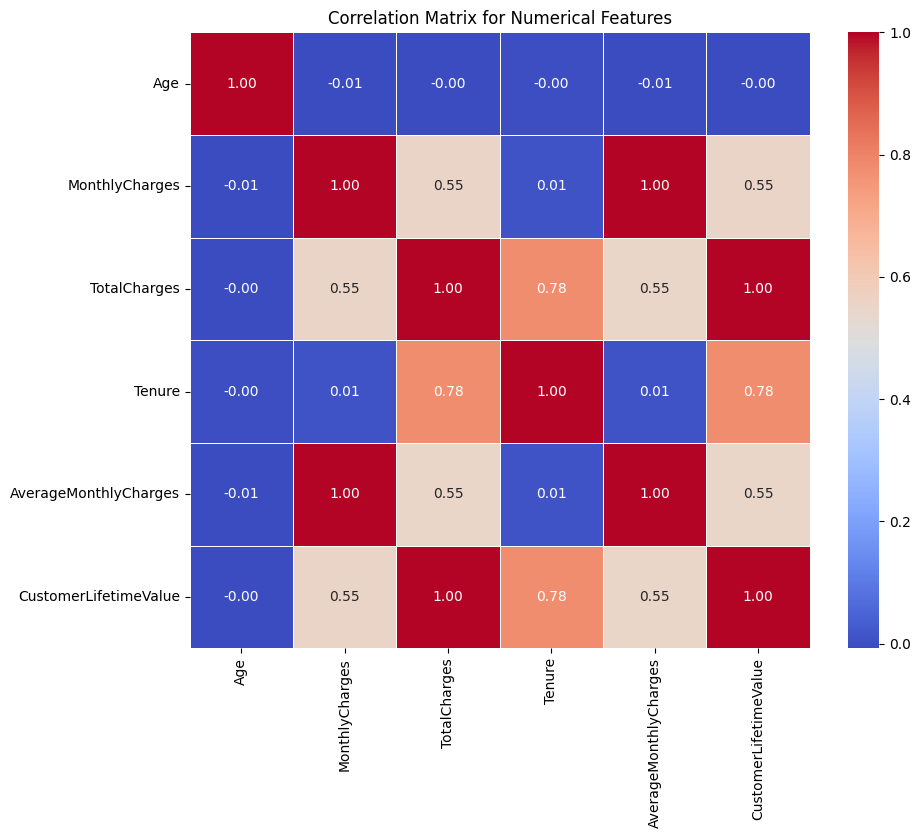

In [16]:
# finds the correlation between the features
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [17]:
df.head()

,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,AverageMonthlyCharges,CustomerLifetimeValue
0,56,Female,Month-to-month,106.68,2027.38,No,Fiber optic,19,Yes,Credit card,No,106.70,2026.92
1,69,Male,Month-to-month,71.92,130.55,No,No,2,No,Credit card,No,65.28,143.84
2,46,Female,Two year,119.32,6553.96,No,Fiber optic,55,Yes,Bank transfer,No,119.16,6562.60
3,32,Female,Month-to-month,21.16,216.19,Yes,No,11,No,Mailed check,No,19.65,232.76
4,60,Male,Month-to-month,49.96,853.61,No,DSL,17,Yes,Bank transfer,Yes,50.21,849.32


# Data Preprocessing
* **Handle Missing Values**: Replace missing values if any with appropriate methods like mean, median, or a constant.
* **Encode Categorical Variables**: Convert categorical variables like Gender, ContractType, PaymentMethod, etc., into numerical formats using techniques like one-hot encoding or label encoding.
* **Feature Scaling**: Standardize or normalize numerical features like MonthlyCharges, TotalCharges, and CustomerLifetimeValue.
* **Class Balancing**: If Churn is imbalanced (which it often is), consider techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weight adjustments.

In [18]:
# import the data preprocessing, oversampling, model building libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE


# Encode categorical features using Label Encoding for binary features and OneHot Encoding for multi-class features
# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male = 1, Female = 0
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])  # Yes = 1, No = 0
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])  # Yes = 1, No = 0
df['Churn'] = label_encoder.fit_transform(df['Churn'])  # Yes = 1, No = 0

# OneHot Encoding for multi-class categorical variables
df = pd.get_dummies(df, columns=['ContractType', 'InternetService', 'PaymentMethod'], drop_first=True)

# Split the dataset into features and target
X = df.drop(columns=[ 'Churn'])  # Features
y = df['Churn']  # Target variable

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Handle imbalanced data using SMOTE Technique
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Summary of the preprocessing steps
{
    "Missing Values": missing_values,
    "Original Training Set Size": len(X_train),
    "Resampled Training Set Size": len(X_train_res),
    "Validation Set Size": len(X_val),
    "Test Set Size": len(X_test),
    "Churn Rate Before SMOTE": y_train.mean(),
    "Churn Rate After SMOTE": y_train_res.mean()
}

{'Missing Values': CustomerID               0
 Age                      0
 Gender                   0
 ContractType             0
 MonthlyCharges           0
 TotalCharges             0
 TechSupport              0
 InternetService          0
 Tenure                   0
 PaperlessBilling         0
 PaymentMethod            0
 Churn                    0
 AverageMonthlyCharges    0
 CustomerLifetimeValue    0
 dtype: int64,
 'Original Training Set Size': 3500,
 'Resampled Training Set Size': 5634,
 'Validation Set Size': 750,
 'Test Set Size': 750,
 'Churn Rate Before SMOTE': 0.19514285714285715,
 'Churn Rate After SMOTE': 0.5}

The original churn rate in the dataset was 19.51%, indicating an imbalanced dataset with significantly fewer customers churning. To address this imbalance, the SMOTE (Synthetic Minority Over-sampling Technique) was applied, which increased the churn rate to 50%, effectively balancing the dataset by equalizing the number of churn and non-churn cases.

In [19]:
# dataframe columns
df.columns

Index(['Age', 'Gender', 'MonthlyCharges', 'TotalCharges', 'TechSupport',
       'Tenure', 'PaperlessBilling', 'Churn', 'AverageMonthlyCharges',
       'CustomerLifetimeValue', 'ContractType_One year',
       'ContractType_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Feature Engineering
* **Aggregate Features**: Create features like AverageMonthlyCharges and CustomerLifetimeValue by aggregating existing ones.
* **Interaction Features**: Consider creating interaction terms, such as Tenure*MonthlyCharges, if relevant.
* **Temporal Features**: Use features like Tenure, which might help in identifying long-term customers.

In [20]:
import numpy as np

# Payment Stability: AutoPay methods (Credit card, Bank transfer)
# Adjust the code to check for credit card since "Bank transfer" isn't listed
df['Is_AutoPay'] = df['PaymentMethod_Credit card'].astype(bool).astype(int)

# Other Features
df['Long_Tenure'] = np.where(df['Tenure'] > df['Tenure'].median(), 1, 0)
df['Is_LongTermContract'] = df['ContractType_One year'] | df['ContractType_Two year']
df['Has_InternetService'] = df['InternetService_Fiber optic'] | (df['InternetService_No'] == 0)
high_monthly_charges_threshold = df['MonthlyCharges'].quantile(0.75)
df['High_MonthlyCharges'] = np.where(df['MonthlyCharges'] > high_monthly_charges_threshold, 1, 0)

# Interaction and Transformation Features
df['Tenure_ContractType_Interaction'] = df['Tenure'] * (
    df['ContractType_One year'] + 2 * df['ContractType_Two year'])
df['TechSupport_InternetService_Interaction'] = df['TechSupport'] * df['Has_InternetService']
df['Log_MonthlyCharges'] = np.log1p(df['MonthlyCharges'])
df['Log_TotalCharges'] = np.log1p(df['TotalCharges'])
df['Tenure_Squared'] = df['Tenure'] ** 2
df['MonthlyCharges_Squared'] = df['MonthlyCharges'] ** 2
df['Tenure_Cubed'] = df['Tenure'] ** 3
df['MonthlyCharges_Cubed'] = df['MonthlyCharges'] ** 3

# Display features
df.head()


,Age,Gender,MonthlyCharges,TotalCharges,TechSupport,Tenure,PaperlessBilling,Churn,AverageMonthlyCharges,CustomerLifetimeValue,...,Has_InternetService,High_MonthlyCharges,Tenure_ContractType_Interaction,TechSupport_InternetService_Interaction,Log_MonthlyCharges,Log_TotalCharges,Tenure_Squared,MonthlyCharges_Squared,Tenure_Cubed,MonthlyCharges_Cubed
0,56,0,106.68,2027.38,0,19,1,0,106.70,2026.92,...,True,1,0,0,4.679164,7.614993,361,11380.6224,6859,1.214085e+06
1,69,1,71.92,130.55,0,2,0,0,65.28,143.84,...,False,0,0,0,4.289363,4.879387,4,5172.4864,8,3.720052e+05
2,46,0,119.32,6553.96,0,55,1,0,119.16,6562.60,...,True,1,110,0,4.790155,8.787977,3025,14237.2624,166375,1.698790e+06
3,32,0,21.16,216.19,1,11,0,0,19.65,232.76,...,False,0,0,0,3.098289,5.380773,121,447.7456,1331,9.474297e+03
4,60,1,49.96,853.61,0,17,1,1,50.21,849.32,...,True,0,0,0,3.931041,6.750645,289,2496.0016,4913,1.247002e+05


# Model Selection
## Baseline Models:
* Start with simple models like Logistic Regression or Decision Trees to establish a baseline.

In [38]:
# Build logistic regression model and evaluation with classification metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.3, random_state=42)
Logistic_Regression = LogisticRegression(random_state=42, max_iter=1000)
Logistic_Regression.fit(X_train, y_train)
y_pred = Logistic_Regression.predict(X_val)
y_prob = Logistic_Regression.predict_proba(X_val)[:, 1]

print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}")

Accuracy: 0.7309
Precision: 0.7345
Recall: 0.7197
F1 Score: 0.7271
AUC: 0.8007


In [22]:
# Build decision tree classification model and evaluation with classification metrics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=42)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_val)
y_prob = decision_tree.predict_proba(X_val)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}")


Accuracy: 0.7466
Precision: 0.7486
Recall: 0.7475
F1 Score: 0.7481
AUC: 0.7466


Since the baseline models showed relatively low accuracy, we moved towards more complex and advanced models to improve predictive accuracy and enhance the model's ability to generalize effectively across the dataset.

## Advanced Models:
* Experiment with more complex models like Random Forest, Gradient Boosting Machines (GBM), XGBoost

In [23]:
# Build Random forest classification model and evaluation with classification metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=42)

Random_Forest = RandomForestClassifier(random_state=42)
# Train the model
Random_Forest.fit(X_train, y_train)

# Make predictions
y_pred = Random_Forest.predict(X_val)
y_prob = Random_Forest.predict_proba(X_val)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}")

Accuracy: 0.8048
Precision: 0.8318
Recall: 0.7673
F1 Score: 0.7982
AUC: 0.8684


In [24]:
# Build Gradient boosting classifier model and evaluation with classification metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Train-Test Split (assuming X_train_res and y_train_res are your resampled datasets)
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=42)

GB_Clf = GradientBoostingClassifier(random_state=42)
# Train the model
GB_Clf.fit(X_train, y_train)

# Make predictions
y_pred = GB_Clf.predict(X_val)
y_prob = GB_Clf.predict_proba(X_val)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}")

Accuracy: 0.7693
Precision: 0.8299
Recall: 0.6812
F1 Score: 0.7483
AUC: 0.8341


In [25]:
# Build Extreme gradient boosting classifier model and evaluation with classification metrics

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Train-Test Split (assuming X_train_res and y_train_res are your resampled datasets)
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=42)

XGB_Clf = XGBClassifier(random_state=42, eval_metric='logloss')
# Train the model
XGB_Clf.fit(X_train, y_train)

# Make predictions
y_pred = XGB_Clf.predict(X_val)
y_prob = XGB_Clf.predict_proba(X_val)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}")

Accuracy: 0.8006
Precision: 0.8233
Recall: 0.7687
F1 Score: 0.7950
AUC: 0.8709


Model: Logistic Regression
Accuracy: 0.7317
Precision: 0.7409
Recall: 0.7179
F1 Score: 0.7292
AUC: 0.7983
----------------------------------------
Model: Random Forest
Accuracy: 0.8048
Precision: 0.8318
Recall: 0.7673
F1 Score: 0.7982
AUC: 0.8684
----------------------------------------
Model: Gradient Boosting
Accuracy: 0.7693
Precision: 0.8299
Recall: 0.6812
F1 Score: 0.7483
AUC: 0.8341
----------------------------------------
Model: XGBoost
Accuracy: 0.8006
Precision: 0.8233
Recall: 0.7687
F1 Score: 0.7950
AUC: 0.8709
----------------------------------------


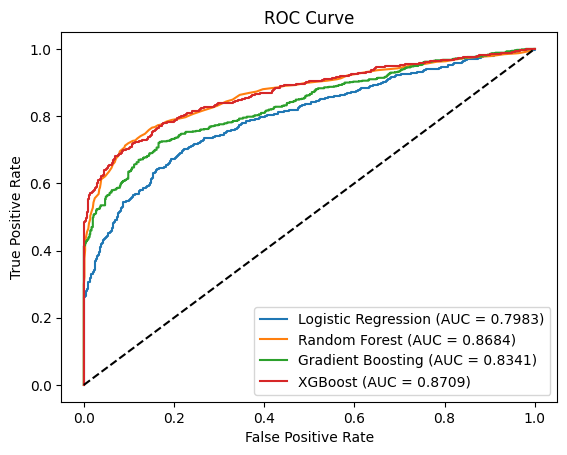

In [26]:
# check the overall models accuarcy and performance

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train-Test Split (assuming X_train_res and y_train_res are your resampled datasets)
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=42)

# Model Training
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42,  eval_metric='logloss')
}

# Fit models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
    print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}")
    print("-" * 40)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_val, y_prob):.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



After analyzing the performance, accuracy, and evaluation metrics of all models, we concluded that the Random Forest model is the best choice. It has a superior Area Under the Curve (AUC) of 0.8684, which significantly exceeds the 0.5 threshold, indicating strong predictive power. Additionally, its precision, recall, and accuracy metrics suggest that it can accurately identify customers at risk of churn.

In [27]:
# Hyperparameter Tuning for the random forest model using GridsearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best model evaluation
best_rf = grid_search_rf.best_estimator_
y_pred_best = best_rf.predict(X_val)
y_prob_best = best_rf.predict_proba(X_val)[:, 1]

print("Best Random Forest Model")
print(f"Best Params: {grid_search_rf.best_params_}")
print(f"Accuracy: {accuracy_score(y_val, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_best):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_prob_best):.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Model
Best Params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8084
Precision: 0.8341
Recall: 0.7729
F1 Score: 0.8023
AUC: 0.8727


In [28]:
from sklearn.metrics import classification_report
# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_val, y_pred_best)}")
print(classification_report(y_val, y_pred_best))

Accuracy: 0.808374733853797
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       700
           1       0.83      0.77      0.80       709

    accuracy                           0.81      1409
   macro avg       0.81      0.81      0.81      1409
weighted avg       0.81      0.81      0.81      1409



After tuning with GridSearchCV, the Random Forest model achieved its best performance with max_depth=30, min_samples_leaf=1, min_samples_split=2, and n_estimators=300. It delivered an accuracy of 80.84%, precision of 83.41%, recall of 77.29%, F1 score of 80.23%, and an AUC of 0.8727, showing strong predictive power and generalization.

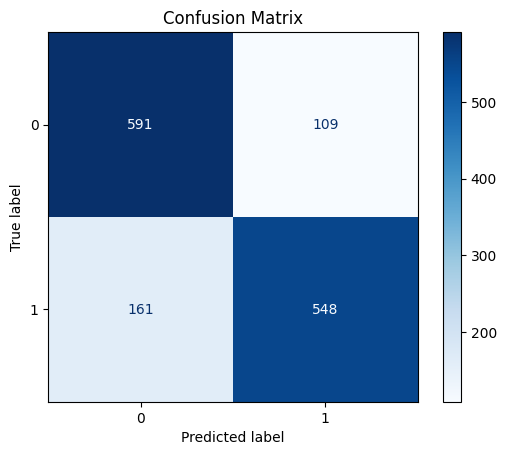

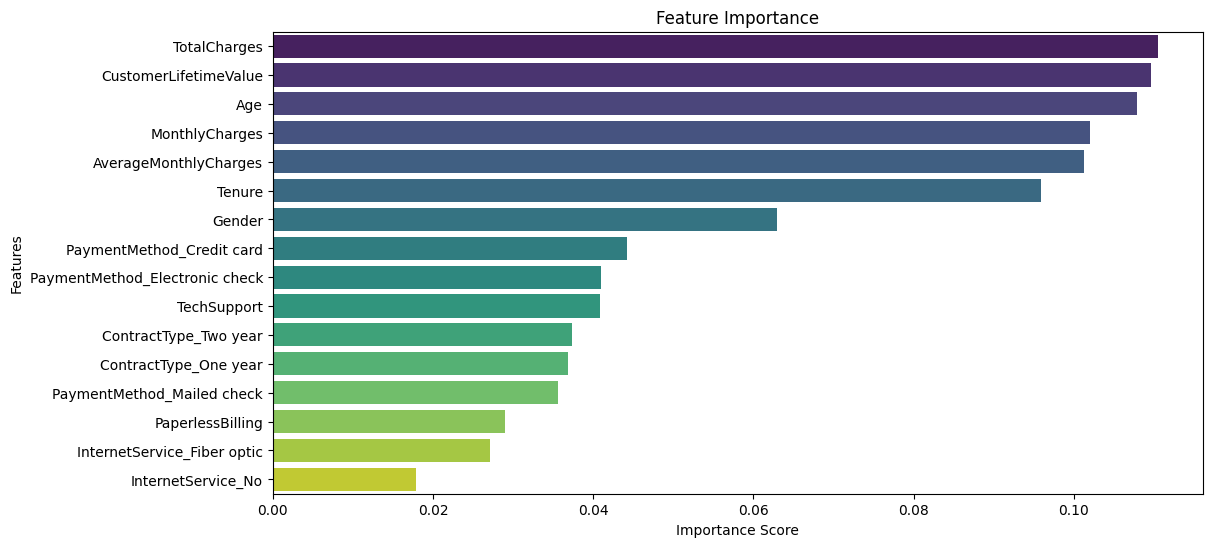

Top 5 Features Driving Churn:
1. TotalCharges - Importance: 0.1106
2. CustomerLifetimeValue - Importance: 0.1096
3. Age - Importance: 0.1078
4. MonthlyCharges - Importance: 0.1020
5. AverageMonthlyCharges - Importance: 0.1012


In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the best model after evaluation is 'best_rf' (Random Forest) from previous code

# Confusion Matrix for Best Model
y_pred_best = best_rf.predict(X_val)
cm = confusion_matrix(y_val, y_pred_best)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Feature Importance for Random Forest
feature_importances = best_rf.feature_importances_
features = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Print the top 5 most important features
top_5_features = features[indices][:5]
print("Top 5 Features Driving Churn:")
for i, feature in enumerate(top_5_features, start=1):
    print(f"{i}. {feature} - Importance: {feature_importances[indices][i-1]:.4f}")


* TotalCharges, MonthlyCharges were highly significant predictors of churn.
* CustomerLifetimeValue importance of customer value in assessing churn risk.
* Age provided insights into how demographic differences affect churn behavior.

In [32]:
pip install shap

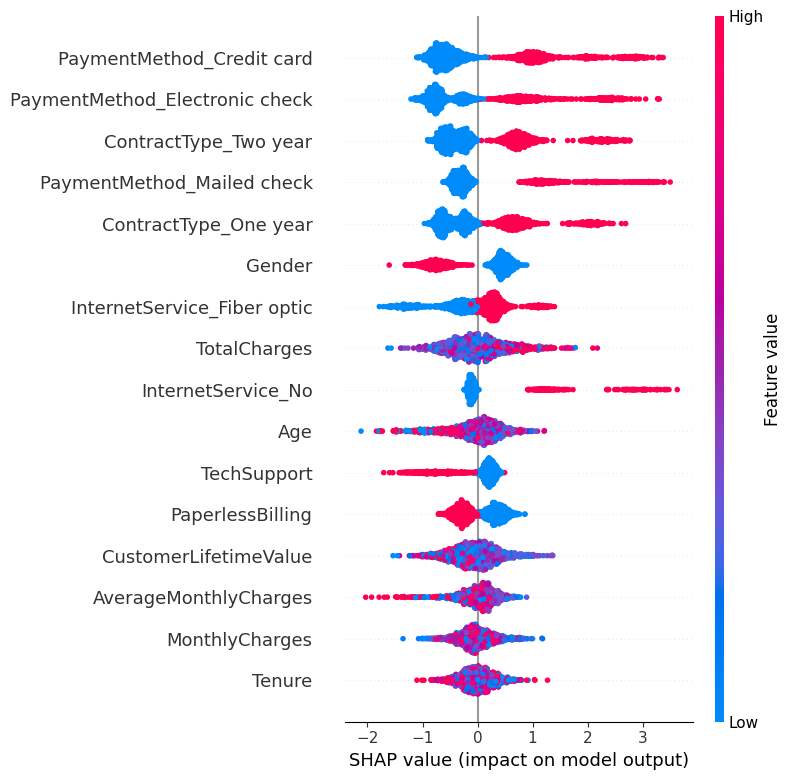

In [33]:
import shap
import xgboost as xgb

# Load your model and data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

# Visualize the SHAP values for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_val.iloc[0,:])

# Summary plot for all features
shap.summary_plot(shap_values, X_val)